# 3. Método iterativo de bisección

## 3. 1 Contexto:

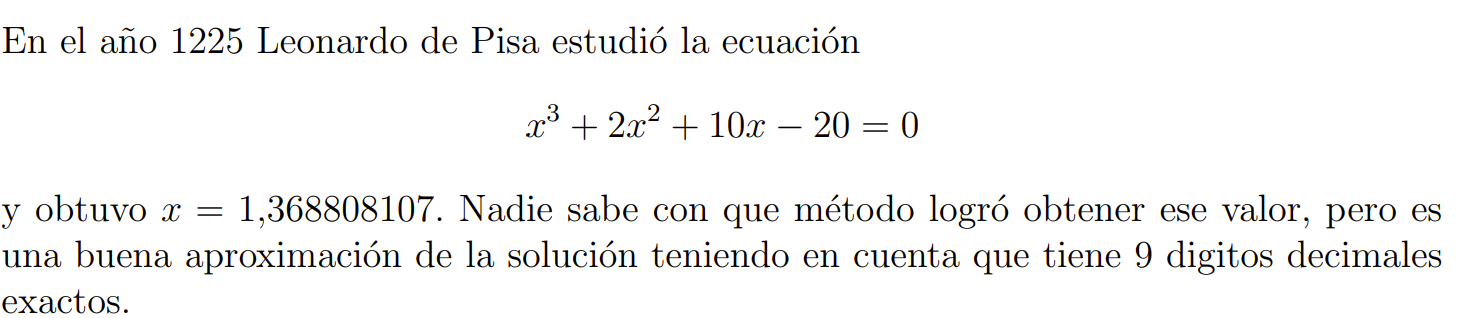


### 3.2 Librerías necesarias para trabajar

In [13]:
import pandas as pd

### 3.3 Implementación del método de bisección para encontrar la raíz de una función.

Argumentos:
- funcion (str): La función como una cadena de texto que 
se evaluará utilizando la función interna `eval()` de Python.
- a (float): El extremo izquierdo del intervalo inicial.
- b (float): El extremo derecho del intervalo inicial.
- tol (float): La tolerancia para la convergencia.

Retornos:
- (dictionary): Un diccionario que contiene una clave (por ejemplo 'a')
 y un valor que tendrá la lista de valores para 
 el criterio durante toda la ejecución. 
 
Este diccionario se utilizará para crear un cuadro de datos 
con la librería pandas y mostrar los resultados.

In [14]:
def bisection(funcion, a, b, tol):

    #Función que obtiene la imagen a partir de una función definida.
    def f(x):
        return eval(funcion)

    #Cálculo inicial del error.
    error = abs(b - a)

    #Vector para almacenar los valores de a, b, c
    # y el error luego de cada iteración.
    data = []

    #El criterio del ciclo consiste en que la ejecución seguirá hasta
    # que se sobrepase la tolerancia definida.
    while error > tol:

        #Cálculo del punto medio
        c = (b + a) / 2

        if f(a) * f(b) >= 0:
            return None  # No se encontró una raíz -
        #caso de error, la función se detiene.

        if f(c) == 0:
            return (0, c, c)  # Raíz exacta encontrada

        if f(c) * f(a) < 0:
            #El punto medio se convierte en el extremo
            # derecho del intervalo en desarollo.
            b = c
        else:
            #El punto medio se convierte en el extremo
            # izquierdo del intervalo en desarollo.
            a = c

        #Para todas las operaciones se cálcula el error
        # de manera que el ciclo pueda cerrarse
        # en algún momento de la ejecución.
        error = abs(b - a)

        #Se agregan los elementos a (extremo izquierdo),
        # b (extremo derecho), c (punto medio)
        # y el error al vector que los almacena.
        row = {'A': a, 'B': b, 'f(Pn)': c, 'Error': error}
        data.append(row)

    return pd.DataFrame(data)

### 3.4 Input de valores para probar el correcto funcionamiento de la función principal de biyección

In [15]:
function = "x**3 + 2*x**2 + 10*x - 20" #función a evaluar
a = -10 #extremo izquierdo del intervalo
b = 10 #extremo derecho del intervalo
tol = 1e-9 #tolerancia
result = bisection(function, a, b, tol) #Llamado a la función

#Se agrega una columna con el número de iteración
result.insert(0, 'Número de iteración', result.index)


#Configuración necesaria para mostrar los resultados con 9 decimales.
pd.set_option('display.float_format', '{:.9f}'.format)

result

,Número de iteración,A,B,f(Pn),Error
0,0,0.000000000,10.000000000,0.000000000,10.000000000
1,1,0.000000000,5.000000000,5.000000000,5.000000000
2,2,0.000000000,2.500000000,2.500000000,2.500000000
3,3,1.250000000,2.500000000,1.250000000,1.250000000
4,4,1.250000000,1.875000000,1.875000000,0.625000000
5,5,1.250000000,1.562500000,1.562500000,0.312500000
6,6,1.250000000,1.406250000,1.406250000,0.156250000
7,7,1.328125000,1.406250000,1.328125000,0.078125000
8,8,1.367187500,1.406250000,1.367187500,0.039062500
9,9,1.367187500,1.386718750,1.386718750,0.019531250


### 3.5 Análisis de los resultados luego de la ejecución.

Observando la salida y los resultados podemos concluir que en la iteración número 33 (zero indexed) se llega al valor encontrado por Leonardo de Pisa con exactamente 9 decimales. 

Por otra parte, se puede analizar que el código y la ejecución termina cuando el nivel de tolerancia ha sido superado en la condición establecida. 